<a href="https://colab.research.google.com/github/Wilson30678tw/Computer-Vision-Project/blob/main/Modify_FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/IAT360/FaceDetectionDataset/images'

data_yaml = f"""
train: {base_dir}/train
val: {base_dir}val

nc: 1
names: ['face']
"""

yaml_path = os.path.join(base_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)

Mounted at /content/drive


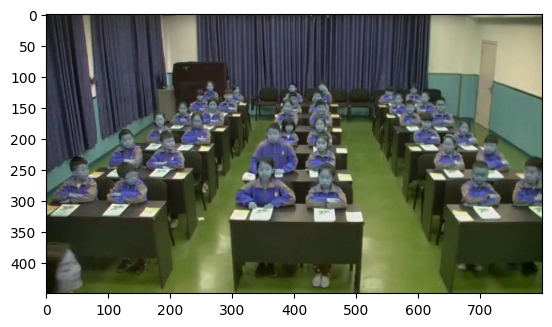

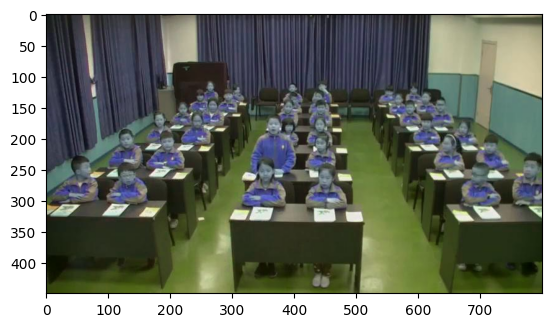

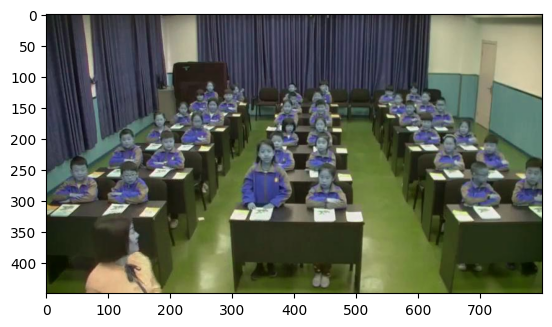

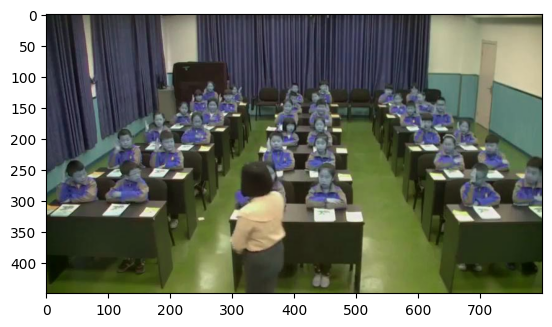

In [2]:
import cv2
import matplotlib.pyplot as plt

#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(base_dir, "train"))):
    img = cv2.imread(os.path.join(base_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [5]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/107.7 GB disk)


In [14]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

In [20]:
from ultralytics import YOLO
import os
os.makedirs('/content/drive/MyDrive/model_direct', exist_ok=True)


model = YOLO('yolov8n.pt')

#model.tune(data="coco8.yaml", epochs=30, iterations=300, optimizer="AdamW", imgsz=640)

model.train(
    data='/content/drive/MyDrive/IAT360/FaceDetectionDataset/data.yaml',
     epochs=30 ,
     lr0=0.001 ,
     batch=16,
     imgsz= 640,
)
model.val()
model.save('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/IAT360/FaceDetectionDataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/wilson30678tw/general/d09a84a10eef408193a12051e8e2189b

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir runs/detect/train6', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/train.cache... 330 images, 0 backgrounds, 0 corrupt: 100%|██████████| 330/330 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/141.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/186.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/train/223.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 230 images, 16 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed
Plotting labels to runs/detect/train6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      2.183      3.512       1.62        745        640:  10%|▉         | 2/21 [00:56<09:00, 28.47s/it]


KeyboardInterrupt: 

In [18]:
#model = YOLO('/content/drive/MyDrive/model_direct/yolov8_trained_model.pt')
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 230 images, 16 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:42<00:00,  2.81s/it]


                   all        230       6366      0.972      0.376      0.851      0.545
Speed: 1.8ms preprocess, 153.1ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train52


0.3762856724430759

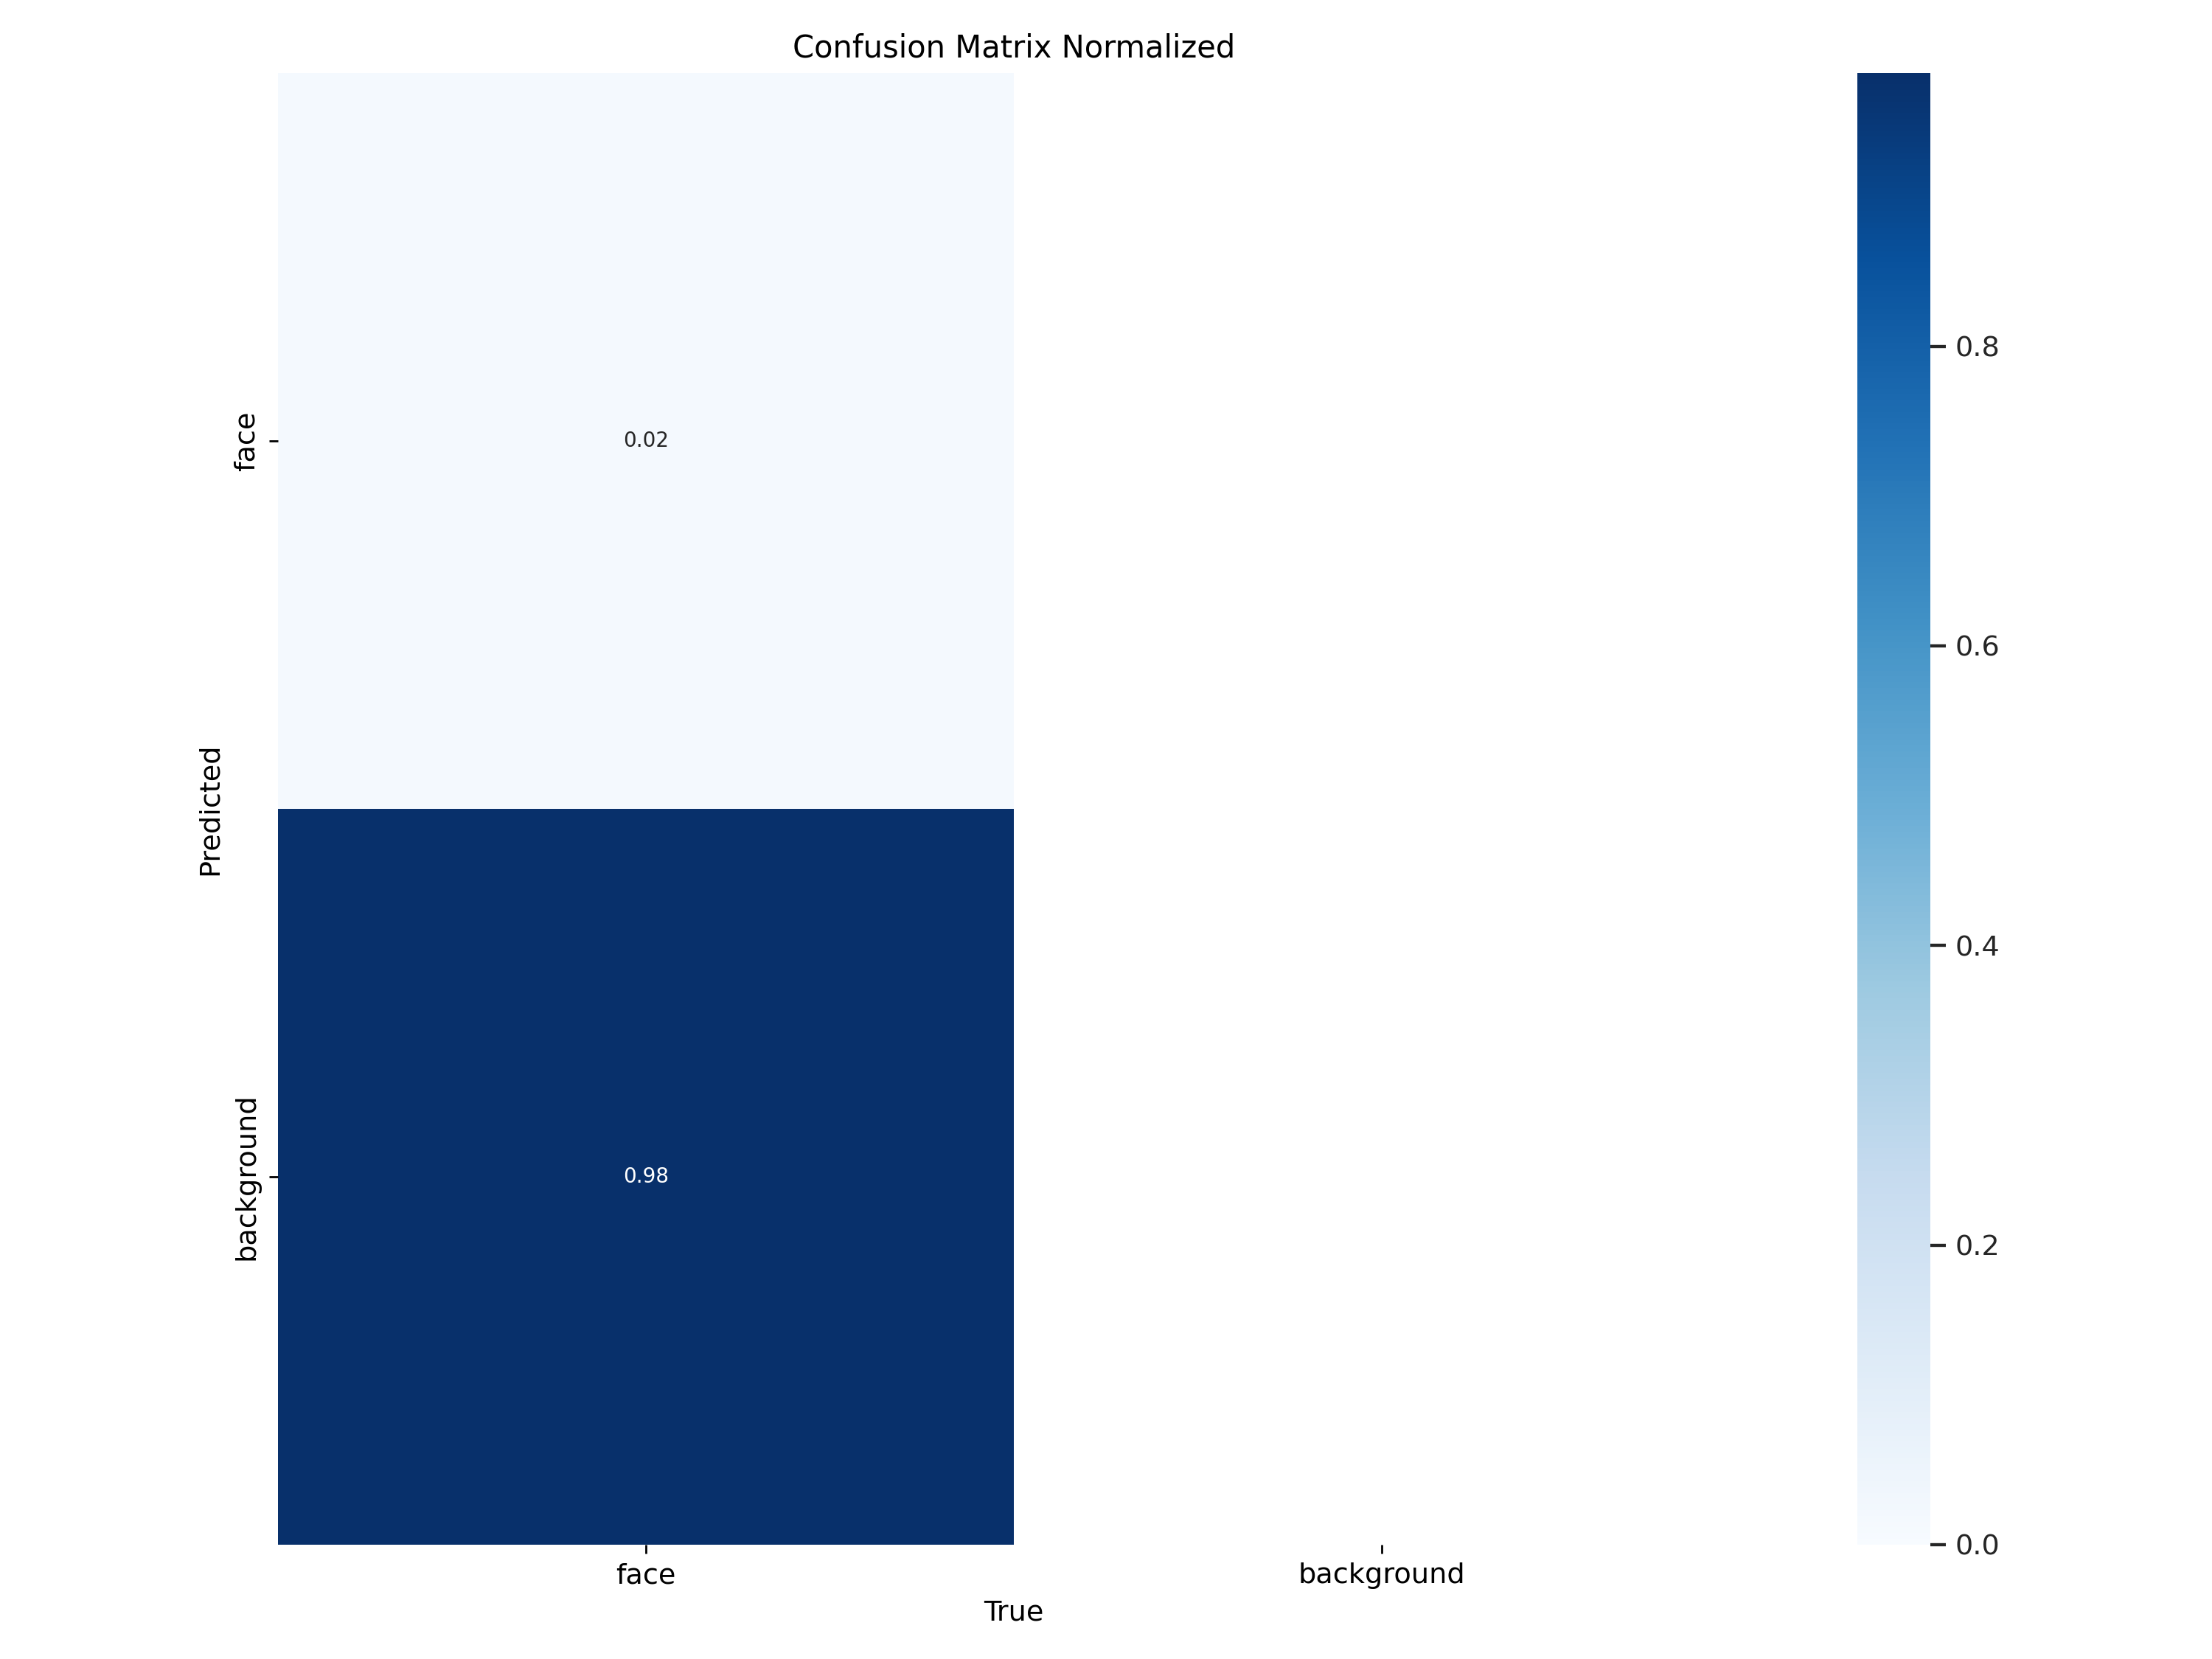

In [19]:

%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train52/confusion_matrix_normalized.png')

  0%|          | 0.00/490k [00:00<?, ?B/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


100%|██████████| 490k/490k [00:00<00:00, 10.5MB/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/9e3540de132b4bbea1ad48467538db33.png: 448x640 7 faces, 321.2ms
Speed: 5.9ms preprocess, 321.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
检测到的人脸数量: 7


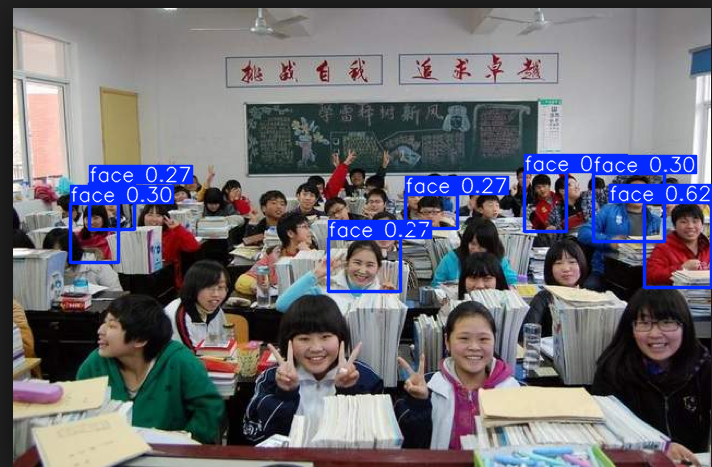

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

imagePath = 'https://i.pinimg.com/originals/9e/35/40/9e3540de132b4bbea1ad48467538db33.png'

results = model.predict(source=imagePath)

face_count = 0
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show (doesn't work on colab)
    im.save('results.jpg')  # save image
    face_count += len(r.boxes.xyxy)

print("检测到的人脸数量:", face_count)

#show image directly
from google.colab.patches import cv2_imshow
cv2_imshow(im_array)